In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import pandas_profiling as pp

In [2]:
df=pd.read_table("C:/Users/mukul/Downloads/Internship/AOL/user-ct-test-collection-02.txt")

In [3]:
df.head(10)

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com
5,479,car decals,2006-03-03 23:20:12,4.0,http://www.decaljunky.com
6,479,car decals,2006-03-03 23:20:12,1.0,http://www.modernimage.net
7,479,car decals,2006-03-03 23:20:12,5.0,http://www.webdecal.com
8,479,car window decals,2006-03-03 23:24:05,9.0,http://www.customautotrim.com
9,479,car window sponsor decals,2006-03-03 23:27:17,3.0,http://www.streetglo.net


In [4]:
df.tail(10)

,AnonID,Query,QueryTime,ItemRank,ClickURL
3614496,24968286,games,2006-05-31 17:28:45,NaN,NaN
3614497,24968768,www.riteaid..com,2006-05-31 14:48:33,NaN,NaN
3614498,24969002,www. 1 .com,2006-05-31 21:17:10,NaN,NaN
3614499,24969423,my space. com 3131560415,2006-05-31 19:02:36,NaN,NaN
3614500,24969423,my space. com 3131560415,2006-05-31 19:03:16,NaN,NaN
3614501,24969423,my space. com,2006-05-31 19:03:32,2.0,http://music.myspace.com
3614502,24969423,my space.com,2006-05-31 19:12:00,NaN,NaN
3614503,24969423,my space.com 3131560415,2006-05-31 19:12:25,NaN,NaN
3614504,24969423,jennifer craford my space.com,2006-05-31 19:15:02,NaN,NaN
3614505,24969423,jennifer crawford my space.com,2006-05-31 19:16:05,NaN,NaN


In [5]:
df.describe()

,AnonID,ItemRank
count,3.614506e+06,1.935613e+06
mean,6.906620e+06,6.965649e+00
std,5.935597e+06,2.056457e+01
min,4.790000e+02,0.000000e+00
25%,2.259100e+06,1.000000e+00
50%,5.035127e+06,2.000000e+00
75%,1.025739e+07,6.000000e+00
max,2.496942e+07,5.000000e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614506 entries, 0 to 3614505
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   AnonID     int64  
 1   Query      object 
 2   QueryTime  object 
 3   ItemRank   float64
 4   ClickURL   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 137.9+ MB


In [7]:
df['Query'].unique()

array(['family guy', 'also sprach zarathustra',
       'family guy movie references', ..., 'my space.com 3131560415',
       'jennifer craford my space.com', 'jennifer crawford my space.com'],
      dtype=object)

In [8]:
df['ClickURL'].unique()

array([nan, 'http://www.familyguyfiles.com', 'http://movieweb.com', ...,
       'http://www.lmp.ualberta.ca', 'http://www.cptc.ctc.edu',
       'http://www.mbajungle.com'], dtype=object)

In [9]:
df['Dates'] = pd.to_datetime(df['QueryTime']).dt.date
df['Hours'] = pd.to_datetime(df['QueryTime']).dt.time
df['Hour'] = pd.to_datetime(df['QueryTime']).dt.hour
df['date']=pd.to_datetime(df['QueryTime']).dt.day
df['Month']=pd.to_datetime(df['QueryTime']).dt.month

In [10]:
df.head()

,AnonID,Query,QueryTime,ItemRank,ClickURL,Dates,Hours,Hour,date,Month
0,479,family guy,2006-03-01 16:01:20,NaN,NaN,2006-03-01,16:01:20,16,1,3
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN,2006-03-02,14:48:55,14,2,3
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com,2006-03-03,22:42:42,22,3,3


In [11]:
df.Month.unique()

array([3, 4, 5], dtype=int64)

In [12]:
df['Query']

0                               family guy
1                  also sprach zarathustra
2              family guy movie references
3          top grossing movies of all time
4          top grossing movies of all time
                        ...               
3614501                      my space. com
3614502                       my space.com
3614503            my space.com 3131560415
3614504      jennifer craford my space.com
3614505     jennifer crawford my space.com
Name: Query, Length: 3614506, dtype: object

In [13]:
df.isnull().sum()

AnonID             0
Query            129
QueryTime          0
ItemRank     1678893
ClickURL     1678893
Dates              0
Hours              0
Hour               0
date               0
Month              0
dtype: int64

In [14]:
str=pd.to_datetime(df['QueryTime'])

In [15]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}

In [80]:
dictionart1={'March':3,'April':4,'May':5}

In [81]:
df['monthname']=df['Month'].map(dictionart1)

In [82]:
df['Weekdayname'] = str.dt.day_name()

In [83]:
df['Weekday_ordinal']=df['Weekdayname'].map(dictionary)

In [84]:
df.drop(['QueryTime'],axis=1,inplace=True)

KeyError: "['QueryTime'] not found in axis"

In [90]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning,Afternoon,Evening,monthname
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3,0,1,0,NaN
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4,0,1,0,NaN
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5,0,0,1,NaN
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5,0,0,1,NaN
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5,0,0,1,NaN


<AxesSubplot:xlabel='Weekdayname', ylabel='count'>

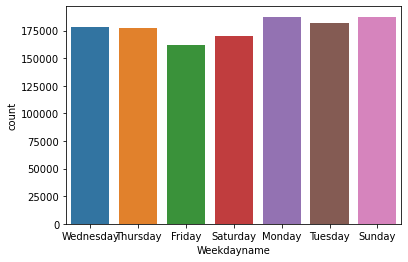

In [85]:
sns.countplot(x='Weekdayname',data=df)

<AxesSubplot:xlabel='Weekdayname', ylabel='Count'>

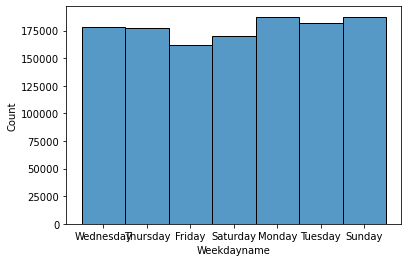

In [86]:
sns.histplot(data=df,x='Weekdayname')

In [87]:
df.count()

AnonID             1244496
Query              1244495
ItemRank            546814
ClickURL            546814
Dates              1244496
Hours              1244496
Hour               1244496
date               1244496
Month              1244496
Weekdayname        1244496
Weekday_ordinal    1244496
Morning            1244496
Afternoon          1244496
Evening            1244496
monthname                0
dtype: int64

# Typical time spent by users on the search engine

In [88]:
df.Hour.mean()

14.565699688870033

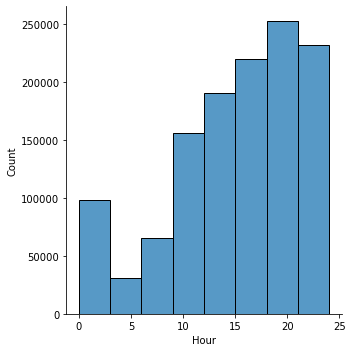

In [89]:
sns.displot(data=df,x='Hour',binwidth=3)

In [25]:
query=set(df['Query'])

In [26]:
query

{nan,
 'dogs for sale in oregon',
 'hudson libertarian creed',
 'american cancer society pawtucket rhode island',
 'logging lumber calculations',
 'a major immigation international event',
 '.consumersreport.org',
 'manchester nh ripaldi school',
 'bang thumbs',
 'my history aol',
 'popincherry.com',
 'azlyrics.comk',
 'swingerrs',
 'rankin and assocaites',
 'electric power research institute',
 'tekno-robot.com',
 'chinese pug dog canine schreiber',
 'twww.tamagotchi.com',
 'kprc.com',
 'at waters restaurant',
 'elmira malls',
 'last and fawn',
 '6ga 20welded 20pannels 201x2',
 'crimson room',
 'westportharborcondos.com',
 'starpoker',
 'caribbean fruits and vegetables',
 'los desaparecidos',
 'southwestern virginia',
 'no cry sleep solutions',
 'cristal daum',
 'edna texas',
 'delirious lyrics',
 'www.artmovementsecyclopedia.com',
 'big basin',
 '1910 to 1919 gasoline prices',
 'northcentral univ',
 'symantic',
 'www.aolgreeting cards',
 'wailua falls kauai',
 'need money with bad cr

In [27]:
df1=df.dropna()

In [28]:
df1.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5
4,479,top grossing movies of all time,2.0,http://www.imdb.com,2006-03-03,22:42:42,22,3,3,Friday,5
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5
6,479,car decals,1.0,http://www.modernimage.net,2006-03-03,23:20:12,23,3,3,Friday,5


In [29]:
QUER=df.iloc[:,1:2]

In [30]:
nd=QUER.drop_duplicates()

In [31]:
nd

,Query
0,family guy
1,also sprach zarathustra
2,family guy movie references
3,top grossing movies of all time
5,car decals
...,...
3614498,www. 1 .com
3614499,my space. com 3131560415
3614503,my space.com 3131560415
3614504,jennifer craford my space.com


In [32]:
df.drop_duplicates(subset=['Query'],inplace=True)

In [33]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5


# Queries do not seem to have relevant results

In [34]:
df.sort_values(by=['Query'],ascending=False) #This shows that there are many spelling mistakes while searching


,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal
1920433,5524679,üôøä êã,NaN,NaN,2006-04-27,00:20:50,0,27,4,Thursday,4
3298841,16853735,öóêåíãøùçõú,NaN,NaN,2006-04-06,16:23:09,16,6,4,Thursday,4
2611860,9514889,ó úãöá õáø ó úä ó ú ó öäöíäó,NaN,NaN,2006-04-04,18:53:10,18,4,4,Tuesday,2
1920430,5524679,íô ùù ñùü,NaN,NaN,2006-04-23,03:03:50,3,23,4,Sunday,7
2611817,9514889,íã åì ã á ááå ì í íå á í áã æ í á ã æ åì ã í æ...,NaN,NaN,2006-03-18,22:29:43,22,18,3,Saturday,6
...,...,...,...,...,...,...,...,...,...,...,...
2660077,9872456,& signs,NaN,NaN,2006-05-12,23:44:11,23,12,5,Friday,5
2182533,6819747,& dryers,NaN,NaN,2006-03-06,14:43:38,14,6,3,Monday,1
1238693,3079283,& anthony show radio,NaN,NaN,2006-03-01,18:06:51,18,1,3,Wednesday,3
2172065,6767362,&,NaN,NaN,2006-05-06,23:22:41,23,6,5,Saturday,6


In [35]:
nd.count()

Query    1244495
dtype: int64

In [36]:
df1.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5
4,479,top grossing movies of all time,2.0,http://www.imdb.com,2006-03-03,22:42:42,22,3,3,Friday,5
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5
6,479,car decals,1.0,http://www.modernimage.net,2006-03-03,23:20:12,23,3,3,Friday,5


In [37]:
df1['ClickURL'].max()

'https://zulu.ssc.nasa.gov/mrsid/'

In [38]:
df1['ClickURL'].min()

'ftp://dftp.maritimemagazine.com/mn200502o2.pdf'

In [39]:
df1['ClickURL'].sort_values(ascending=False).head(10)

1226085                     https://zulu.ssc.nasa.gov/mrsid/
2286547    https://yosemite.epa.gov/opei/ptrack.nsf/vaprv...
2259292    https://wx9.registeredsite.com/user1024624/miv...
2259287    https://wx9.registeredsite.com/user1024624/miv...
2133035    https://wx11.registeredsite.com/user836678/sem...
1445650    https://wwws2.blaze.ca/~amc00/themagazine/bsg....
1949135       https://wwws.coworkforce.com/ucontinuedclaims/
1949136       https://wwws.coworkforce.com/ucontinuedclaims/
1949134       https://wwws.coworkforce.com/ucontinuedclaims/
3437308              https://wwws.ameritrade.com/apps/login/
Name: ClickURL, dtype: object

In [40]:
df['Hours'].describe()

count      1244496
unique       85450
top       22:06:04
freq            43
Name: Hours, dtype: object

In [41]:
y=df['Query'].values

In [42]:
y

array(['family guy', 'also sprach zarathustra',
       'family guy movie references', ..., 'my space.com 3131560415',
       'jennifer craford my space.com', 'jennifer crawford my space.com'],
      dtype=object)

In [43]:
df1.loc[df1.Query.str.contains('google')]

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal
195,507,google,1.0,http://www.google.com,2006-05-10,11:12:32,11,10,5,Wednesday,3
196,507,google,1.0,http://www.google.com,2006-05-10,11:12:32,11,10,5,Wednesday,3
197,507,google,1.0,http://www.google.com,2006-05-10,11:12:32,11,10,5,Wednesday,3
363,1021,google.com,1.0,http://www.google.com,2006-03-09,14:48:46,14,9,3,Thursday,4
393,1021,google.com,1.0,http://www.google.com,2006-05-15,11:00:44,11,15,5,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...
3613505,24879215,www.google.com,1.0,http://www.google.com,2006-05-30,19:07:28,19,30,5,Tuesday,2
3613804,24904217,google.com,2.0,http://toolbar.google.com,2006-05-30,15:48:47,15,30,5,Tuesday,2
3614166,24945449,google,1.0,http://www.google.com,2006-05-31,16:17:24,16,31,5,Wednesday,3
3614167,24945449,google,1.0,http://www.google.com,2006-05-31,16:17:24,16,31,5,Wednesday,3


In [44]:
df1["Query"].max()

'zzsounds.con'

In [45]:
df1.loc[df1.Query.str.contains('zzsounds.con')]

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal
1581969,4152981,zzsounds.con,1.0,http://www.zzounds.com,2006-05-19,16:53:51,16,19,5,Friday,5


In [46]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5


In [47]:
df.Hour.unique()

array([16, 14, 22, 23, 21,  0, 17,  9, 18,  1, 11, 15, 19, 20, 10,  8, 13,
       12,  7,  6,  3,  4,  5,  2], dtype=int64)

In [48]:
df['Morning']=np.where(df['Hour']<=12,1,0)

In [49]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3,0
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4,0
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5,0
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5,0
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5,0


In [50]:
df[df['Morning']==1]

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning
30,479,howard stern lawsuit,NaN,NaN,2006-03-08,00:14:55,0,8,3,Wednesday,3,1
32,479,opec,NaN,NaN,2006-03-09,09:19:29,9,9,3,Thursday,4,1
48,479,www.galleryhost.com,NaN,NaN,2006-03-15,01:13:14,1,15,3,Wednesday,3,1
50,479,ronny van zant,NaN,NaN,2006-03-22,00:23:17,0,22,3,Wednesday,3,1
51,479,ronnie van zant,NaN,NaN,2006-03-22,00:23:55,0,22,3,Wednesday,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3614458,24967077,digetive,2.0,http://uillinoismedcenter.org,2006-05-31,02:43:48,2,31,5,Wednesday,3,1
3614465,24967077,polyp pictures,11.0,http://www.gastrolab.net,2006-05-31,03:17:55,3,31,5,Wednesday,3,1
3614467,24967077,rectal polyp pictures,NaN,NaN,2006-05-31,03:31:29,3,31,5,Wednesday,3,1
3614468,24967077,rectum polyp pictures,10.0,http://www.dfci.harvard.edu,2006-05-31,03:33:40,3,31,5,Wednesday,3,1


In [51]:
df['Afternoon']=np.where((df['Hour']>=12) & (df['Hour']<=17),1,0)

In [52]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning,Afternoon
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3,0,1
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4,0,1
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5,0,0
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5,0,0
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5,0,0


In [53]:
df[df['Afternoon']==1]

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning,Afternoon
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3,0,1
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4,0,1
31,479,sirius playboy,3.0,http://www.orbitcast.com,2006-03-08,17:23:07,17,8,3,Wednesday,3,0,1
57,479,proofs for the existence of god,1.0,http://www.godlessgeeks.com,2006-03-27,15:45:39,15,27,3,Monday,1,0,1
63,479,germa translator,NaN,NaN,2006-03-31,15:44:15,15,31,3,Friday,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614401,24960116,humans sex animals,NaN,NaN,2006-05-31,16:37:18,16,31,5,Wednesday,3,0,1
3614410,24960642,pinemountainsafari,NaN,NaN,2006-05-31,17:48:19,17,31,5,Wednesday,3,0,1
3614451,24965820,artharbor.org,NaN,NaN,2006-05-31,12:29:23,12,31,5,Wednesday,3,1,1
3614453,24965820,couric,1.0,http://www.geocities.com,2006-05-31,12:32:16,12,31,5,Wednesday,3,1,1


In [54]:
df['Evening']=np.where((df['Hour']>=17),1,0)

In [55]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning,Afternoon,Evening
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3,0,1,0
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4,0,1,0
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5,0,0,1
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5,0,0,1
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5,0,0,1


<AxesSubplot:xlabel='Morning', ylabel='count'>

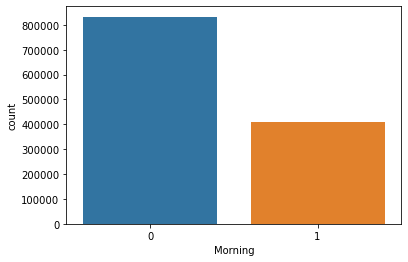

In [56]:
sns.countplot(data=df,x='Morning')

<AxesSubplot:xlabel='Afternoon', ylabel='count'>

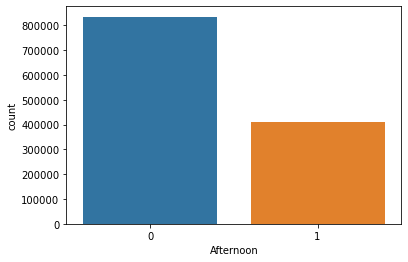

In [57]:
sns.countplot(data=df,x='Afternoon')

<AxesSubplot:xlabel='Evening', ylabel='count'>

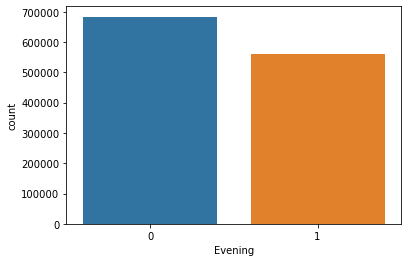

In [58]:
sns.countplot(data=df,x='Evening')#This shows that more people use AOl in evening

<AxesSubplot:xlabel='Morning', ylabel='count'>

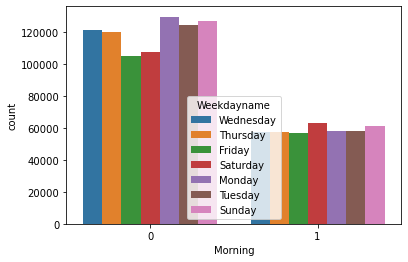

In [59]:
sns.countplot(data=df,x='Morning',hue='Weekdayname')

<AxesSubplot:xlabel='Afternoon', ylabel='count'>

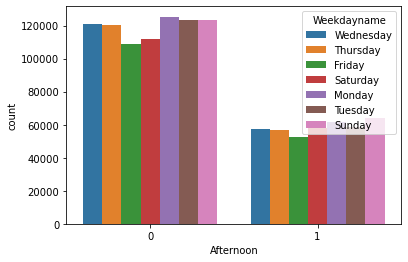

In [60]:
sns.countplot(data=df,x='Afternoon',hue='Weekdayname')

<AxesSubplot:xlabel='Evening', ylabel='count'>

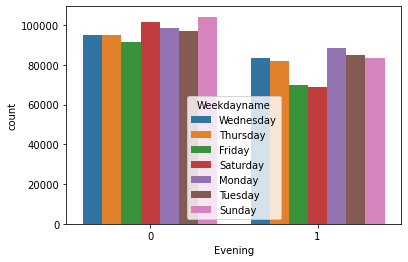

In [61]:
sns.countplot(data=df,x='Evening',hue='Weekdayname')

In [62]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning,Afternoon,Evening
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3,0,1,0
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4,0,1,0
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5,0,0,1
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5,0,0,1
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5,0,0,1


<AxesSubplot:xlabel='Month', ylabel='count'>

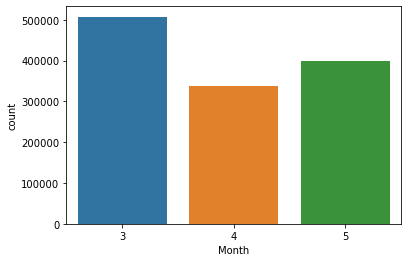

In [69]:
sns.countplot(data=df,x='Month')#This shows that there is more use of AOL in month of March

In [ ]:
sns.histplot()

In [64]:
df['ClickURL']

0                                    NaN
1                                    NaN
2          http://www.familyguyfiles.com
3                    http://movieweb.com
5              http://www.decaljunky.com
                       ...              
3614498                              NaN
3614499                              NaN
3614503                              NaN
3614504                              NaN
3614505                              NaN
Name: ClickURL, Length: 1244496, dtype: object

In [65]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning,Afternoon,Evening
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3,0,1,0
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4,0,1,0
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5,0,0,1
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5,0,0,1
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5,0,0,1


In [66]:
df.groupby(['ClickURL'])['Query'].count().sort_values(ascending=False).head(20)

ClickURL
http://en.wikipedia.org       4008
http://www.amazon.com         3790
http://www.imdb.com           3714
http://www.tripadvisor.com    1302
http://www.geocities.com      1273
http://profile.myspace.com    1085
http://www.azlyrics.com       1022
http://www.sing365.com         984
http://www.bizrate.com         917
http://www.superpages.com      862
http://cgi.ebay.com            852
http://travel.yahoo.com        848
http://www.tv.com              835
http://www.nextag.com          831
http://www.city-data.com       809
http://www.answers.com         763
http://www.lyrics007.com       736
http://www.cooks.com           701
http://www.angelfire.com       653
http://www.epinions.com        641
Name: Query, dtype: int64

In [67]:
df.head()

,AnonID,Query,ItemRank,ClickURL,Dates,Hours,Hour,date,Month,Weekdayname,Weekday_ordinal,Morning,Afternoon,Evening
0,479,family guy,NaN,NaN,2006-03-01,16:01:20,16,1,3,Wednesday,3,0,1,0
1,479,also sprach zarathustra,NaN,NaN,2006-03-02,14:48:55,14,2,3,Thursday,4,0,1,0
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,22,3,3,Friday,5,0,0,1
3,479,top grossing movies of all time,1.0,http://movieweb.com,2006-03-03,22:42:42,22,3,3,Friday,5,0,0,1
5,479,car decals,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,23,3,3,Friday,5,0,0,1


In [68]:
df.to_csv('out.zip', index=False)

# Few insights that I found interesting.

1.There are more active user in month of March as compare to month of April and May.
2.More people are active in evening than in morning and afternoon.
3.Search for movies on friday.

# Things to share with the Product Manager of Search based on exploratory analysis of this dataset.

1.Monday and Sunday are the best time to target the users.
2.Autocorrection should be included in the features as there are more often spellings miskates while searching.
3.Evening is best time to target the users as more users are active at that time.
4.Most users use search engine for academic purpose, shopping,movie reviews, travel bookings this shows that target audience is young peoples.